2025-04-08: Let's update this with a function that will calculate the odds for any specified die, for any DC, and for any number of rolls. 

This notebook is for calculating the odds of making a given DC with a regular d20 roll, or advantage, or disadvantage.

I'm copying over from some ipython script here. 

In [1]:
import pandas as pd
import matplotlib as pl
import numpy as np

In [2]:
def d20regular(n):
    ...:     odds = (21-n)/20
    ...:     return odds
    

In [3]:
 def d20advantage(n):
    ...:     m = d20regular(n)
    ...:     odds = m*(2-m)
    ...:     return odds

In [4]:
 def d20disadvantage(n):
    ...:     m = d20regular(n)
    ...:     odds = m**2
    ...:     return odds
    ...:

In [33]:
def d24regular(n):
    return (25-n)/24

def d30regular(n):
    return (31-n)/30

In [34]:
reg = {i:round(d20regular(i),3) for i in range(1,21)}
adv = {i:round(d20advantage(i),3) for i in range(1,21)}
dis = {i:round(d20disadvantage(i),3) for i in range(1,21)}
d24 = {i:round(d24regular(i),3) for i in range(1,21)}
d30 = {i:round(d30regular(i),3) for i in range(1,21)}

In [35]:
dnd_odds = pd.DataFrame({i:(reg[i],adv[i], dis[i], d24[i], d30[i]) for i in range(1,21)}).T
dnd_odds.columns = ['reg', 'adv', 'dis', 'd24', 'd30']
dnd_odds.index.name = 'DC'

In [36]:
dnd_odds

,reg,adv,dis,d24,d30
DC,,,,,
1,1.00,1.000,1.000,1.000,1.000
2,0.95,0.997,0.902,0.958,0.967
3,0.90,0.990,0.810,0.917,0.933
4,0.85,0.977,0.722,0.875,0.900
5,0.80,0.960,0.640,0.833,0.867
6,0.75,0.938,0.562,0.792,0.833
7,0.70,0.910,0.490,0.750,0.800
8,0.65,0.878,0.423,0.708,0.767
9,0.60,0.840,0.360,0.667,0.733


<Axes: xlabel='DC', ylabel='odds of hitting target'>

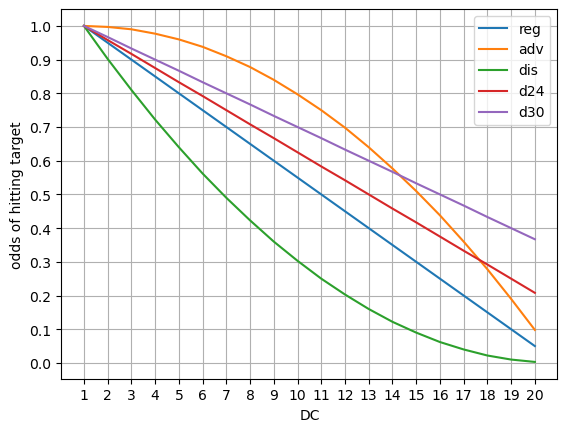

In [37]:
dnd_odds.plot(xticks = range(1,21), yticks = list(np.arange(0,1.1,0.1)), 
              ylabel = 'odds of hitting target', grid = True)

In [112]:
dis_dif = pd.Series(range(1,21), index = range(1,21))
for i in dnd_odds.index:
    if i==1:
        dis_dif.loc[i] = 0
        continue
    odds = dnd_odds.dis[i]
    n = dnd_odds.loc[dnd_odds.reg >= odds].index[-1]
    if n==20:
        dis_dif.loc[i]=i-n
        continue
    m = n+1
    if abs(dnd_odds.reg[n] - odds) > abs(dnd_odds.reg[m] - odds):
        n=m
    dis_dif.loc[i] = i-n

The odds are so bad for DC 18 and higher with disadvantage that there is no equivalent subtraction

In [115]:
dis_dif.loc[18:20] = float('nan')

In [116]:
adv_dif = pd.Series(range(1,21), index = range(1,21))
for i in adv_dif.index:
    if i==1:
        adv_dif.loc[i] = 0
        continue
    odds = dnd_odds.adv[i]
    n = dnd_odds.loc[dnd_odds.reg >= odds].index[-1]
    m = n+1
    if abs(dnd_odds.reg[n] - odds) > abs(dnd_odds.reg[m] - odds):
        n=m
    adv_dif.loc[i] = i-n

In [120]:
di_adj = pd.DataFrame([adv_dif, dis_dif])
di_adj.name = 'DC'
di_adj.index = ['adv', 'dis']

In [121]:
di_adj

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
adv,0.0,1.0,2.0,3.0,3.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,3.0,3.0,2.0,1.0
dis,0.0,-1.0,-2.0,-3.0,-3.0,-4.0,-4.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-4.0,-4.0,-3.0,NaN,NaN,NaN
